In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/SEGMENTATION/

/content/gdrive/MyDrive/SEGMENTATION


In [ ]:
# Importing Data From COCO

from pycocotools import coco, cocoeval, _mask
from pycocotools import mask as maskUtils 
import array
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline


In [ ]:
CATEGORY_NAMES=['agfields_singleclass']

ANNOTATION_FILE_VAL = '/content/gdrive/MyDrive/SEGMENTATION/256*256/annotations/val2016.json'
ANNOTATION_FILE_TRAIN = '/content/gdrive/MyDrive/SEGMENTATION/256*256/annotations/train2016.json'


In [ ]:
coco_train = coco.COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=CATEGORY_NAMES);
imgIds_train = coco_train.getImgIds(catIds=catIds_train);
imgDict_train = coco_train.loadImgs(imgIds_train)
len(imgIds_train) , len(catIds_train)

loading annotations into memory...
Done (t=3.47s)
creating index...
index created!


(2236, 1)

In [ ]:
coco_val = coco.COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=CATEGORY_NAMES);
imgIds_val = coco_val.getImgIds(catIds=catIds_val);
imgDict_val = coco_val.loadImgs(imgIds_val)
len(imgIds_val) , len(catIds_val)

loading annotations into memory...
Done (t=0.95s)
creating index...
index created!


(559, 1)

In [ ]:
from random import shuffle


shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_train = imgIds_train[0:6000]
imgIds_val = imgIds_val[0:600]


In [ ]:
train_images_field = ["COCO_train2016_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_field = ["COCO_val2016_{0:012d}.jpg".format(ids) for ids in imgIds_val]

In [ ]:
print(len(train_images_field) , len(val_images_field))

2236 559


In [ ]:
train_images_field = ["COCO_train2016_{0:012d}.jpg".format(ids) for ids in imgIds_train]
print(train_images_field)
del_img_train = set(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016")) - set(train_images_field)
for file_name in del_img_train:
  file_name = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)

len(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016"))

['COCO_train2016_000000102335.jpg', 'COCO_train2016_000000101042.jpg', 'COCO_train2016_000000102451.jpg', 'COCO_train2016_000000100781.jpg', 'COCO_train2016_000000102207.jpg', 'COCO_train2016_000000100667.jpg', 'COCO_train2016_000000101868.jpg', 'COCO_train2016_000000100628.jpg', 'COCO_train2016_000000101113.jpg', 'COCO_train2016_000000103068.jpg', 'COCO_train2016_000000102275.jpg', 'COCO_train2016_000000102013.jpg', 'COCO_train2016_000000101031.jpg', 'COCO_train2016_000000100273.jpg', 'COCO_train2016_000000101127.jpg', 'COCO_train2016_000000101657.jpg', 'COCO_train2016_000000103138.jpg', 'COCO_train2016_000000102447.jpg', 'COCO_train2016_000000100830.jpg', 'COCO_train2016_000000100710.jpg', 'COCO_train2016_000000100711.jpg', 'COCO_train2016_000000101537.jpg', 'COCO_train2016_000000102303.jpg', 'COCO_train2016_000000102161.jpg', 'COCO_train2016_000000101065.jpg', 'COCO_train2016_000000100784.jpg', 'COCO_train2016_000000100736.jpg', 'COCO_train2016_000000102647.jpg', 'COCO_train2016_000

2236

In [ ]:
val_images_field = ["COCO_val2016_{0:012d}.jpg".format(ids) for ids in imgIds_val]
print(val_images_field)
del_img_val = set(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016")) - set(val_images_field)
for file_name in del_img_val:
  file_name = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016/" + file_name
  if os.path.exists(file_name):
    os.remove(file_name)

len(os.listdir("/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016"))

['COCO_val2016_000000102209.jpg', 'COCO_val2016_000000101305.jpg', 'COCO_val2016_000000100598.jpg', 'COCO_val2016_000000100864.jpg', 'COCO_val2016_000000101395.jpg', 'COCO_val2016_000000102613.jpg', 'COCO_val2016_000000102340.jpg', 'COCO_val2016_000000100727.jpg', 'COCO_val2016_000000100491.jpg', 'COCO_val2016_000000101788.jpg', 'COCO_val2016_000000102249.jpg', 'COCO_val2016_000000100798.jpg', 'COCO_val2016_000000100051.jpg', 'COCO_val2016_000000102829.jpg', 'COCO_val2016_000000102440.jpg', 'COCO_val2016_000000101578.jpg', 'COCO_val2016_000000100707.jpg', 'COCO_val2016_000000103392.jpg', 'COCO_val2016_000000103025.jpg', 'COCO_val2016_000000100671.jpg', 'COCO_val2016_000000100401.jpg', 'COCO_val2016_000000100349.jpg', 'COCO_val2016_000000100910.jpg', 'COCO_val2016_000000100980.jpg', 'COCO_val2016_000000100005.jpg', 'COCO_val2016_000000100986.jpg', 'COCO_val2016_000000101168.jpg', 'COCO_val2016_000000100032.jpg', 'COCO_val2016_000000102045.jpg', 'COCO_val2016_000000103151.jpg', 'COCO_val

559

In [ ]:
from PIL import Image


In [ ]:
count = 0 

for ID in imgIds_train:

  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_train2016/COCO_train2016_{0:012d}.jpg".format(ID)
  
  sampleImgIds = coco_train.getImgIds(imgIds = [ID])
  sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

  annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
  anns = coco_train.loadAnns(annIds)


  mask = coco_train.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco_train.annToMask(anns[i])
  
  mask = Image.fromarray(mask * 255 , mode = "L")
  mask.save(file_path)
  count = count + 1
  print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
count = 0 
for ID in imgIds_val:

  file_path = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_val2016/COCO_val2016_{0:012d}.jpg".format(ID)
  
  sampleImgIds = coco_val.getImgIds(imgIds = [ID])
  sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

  annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
  anns = coco_val.loadAnns(annIds)


  mask = coco_val.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco_val.annToMask(anns[i])
  
  mask = Image.fromarray(mask * 255 , mode = "L")
  mask.save(file_path)
  
  count = count + 1
  print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Data Generator

In [ ]:
import os
import sys
import random

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

seed = 2019

random.seed = seed
np.random.seed = seed 

In [ ]:
class DataGen(tf.keras.utils.Sequence):
  
  def __init__(self , path_input , path_mask , batch_size = 16 , image_size = 256):
    
    self.ids = os.listdir(path_input)
    self.path_input = path_input
    self.path_mask = path_mask
    self.batch_size = batch_size
    self.image_size = image_size
    self.on_epoch_end()
  
  def __load__(self , id_name):
    
    image_path = os.path.join(self.path_input , id_name)
    mask_path = os.path.join(self.path_mask , id_name) 
    
    image = cv2.imread(image_path , 1) # 1 specifies RGB format
    image = cv2.resize(image , (self.image_size , self.image_size)) # resizing before inserting to the network
    
    mask = cv2.imread(mask_path , -1)
    mask = cv2.resize(mask , (self.image_size , self.image_size))
    mask = mask.reshape((self.image_size , self.image_size , 1))
      
    #normalize image
    image = image / 255.0
    mask = mask / 255.0
    
    return image , mask
  
  def __getitem__(self , index):
    
    if (index + 1)*self.batch_size > len(self.ids):
      self.batch_size = len(self.ids) - index * self.batch_size
        
    file_batch = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
    
    images = []
    masks = []
    
    for id_name in file_batch : 
      
      _img , _mask = self.__load__(id_name)
      images.append(_img)
      masks.append(_mask)
    
    
    images = np.array(images)
    masks = np.array(masks)
    
    
    return images , masks
  
  
  def on_epoch_end(self):
    pass
  
  
  def __len__(self):
    
    return int(np.ceil(len(self.ids) / float(self.batch_size)))

#UNet

In [ ]:
def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

In [ ]:
def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

In [ ]:
def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv



In [ ]:
def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    
    return conv
    

In [ ]:
def UNet(input_shape = (256,256,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = Model(inputs = inputs , outputs = output)
    
    
    return model
    

In [ ]:
model = UNet(input_shape = (256,256,3))
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
image_size = 256 
epochs = 50
batch_size = 16


In [ ]:
filepath = "/content/gdrive/MyDrive/SEGMENTATION/checkpoint/coco_model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)

callbacks_list = [earlystopper, checkpoint, reduce_lr]

In [ ]:
train_gen = DataGen(path_input = "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016" , path_mask = "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_train2016" , batch_size = batch_size , image_size = image_size)
val_gen = DataGen(path_input =  "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/val2016", path_mask =  "/content/gdrive/MyDrive/SEGMENTATION/mask/coco_mask_val2016", batch_size = batch_size , image_size = image_size)


train_steps =  len(os.listdir( "/content/gdrive/MyDrive/SEGMENTATION/256*256/images/train2016"))/batch_size


model.fit_generator(train_gen , validation_data = val_gen , steps_per_epoch = train_steps , epochs=epochs, verbose = True,  callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
140/139 [==============================] - ETA: 0s - loss: 0.4836 - accuracy: 0.6366
Epoch 1: val_loss improved from inf to 1.24212, saving model to /content/gdrive/MyDrive/SEGMENTATION/checkpoint/coco_model.h5
139/139 [==============================] - 200s 1s/step - loss: 0.4836 - accuracy: 0.6366 - val_loss: 1.2421 - val_accuracy: 0.4484 - lr: 1.0000e-04
Epoch 2/50
140/139 [==============================] - ETA: 0s - loss: 0.4016 - accuracy: 0.6802
Epoch 2: val_loss improved from 1.24212 to 0.83064, saving model to /content/gdrive/MyDrive/SEGMENTATION/checkpoint/coco_model.h5
139/139 [==============================] - 68s 485ms/step - loss: 0.4016 - accuracy: 0.6802 - val_loss: 0.8306 - val_accuracy: 0.4890 - lr: 1.0000e-04
Epoch 3/50
140/139 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.6674
Epoch 3: val_loss improved from 0.83064 to 0.68369, saving model to /content/gdrive/MyDrive/SEGMENTATION/checkpoint/coco_model.h5
139/139 [=================

In [ ]:
x, y = val_gen.__getitem__(6)
result = model.predict(x)

result = result > 0.5



fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

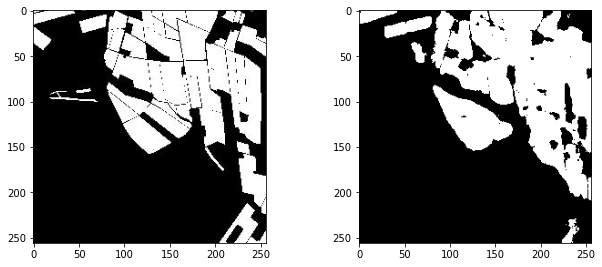

In [ ]:
x, y = val_gen.__getitem__(6)
result = model.predict(x)

result = result > 0.5



fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")